# kV dosimetry

In [1]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import mpUtilities.mc2 as mc2
import mpUtilities.graphUtils as grp
# Note the mpUtilities libraries are custom libraries
import matplotlib.pyplot as plt
import numpy as np

### Characteristics of kV x-rays

Kilovoltage x-rays have a maximum dose that occurs close to the patient surface. It then drops off rapidly due to attenuation and scattering. This is illustrated in the figure below which shows percentage depth dose curves for the three energies available on our Gulmay kV unit measured using a Markus chamber in a water tank:

(0, 110)

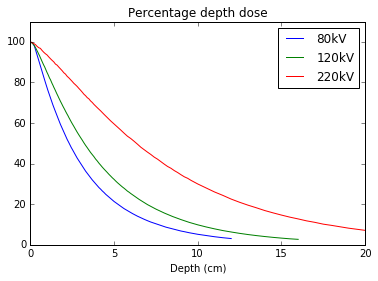

In [2]:
pdd_80=mc2.read_mc2("./data/kV/80kV_5cm_circle_pdd.mcc", 4, 193)
pdd_120=mc2.read_mc2("./data/kV/120kV_5cm_circle_pdd.mcc", 4, 169)
pdd_220=mc2.read_mc2("./data/kV/220kV_10cm_square_pdd.mcc", 4, 154)
pdd_80.ynorm=grp.normalise_to_max(pdd_80.xdata,pdd_80.ydata)
pdd_120.ynorm=grp.normalise_to_max(pdd_120.xdata,pdd_120.ydata)
pdd_220.ynorm=grp.normalise_to_max(pdd_220.xdata,pdd_220.ydata)
plt.plot(pdd_80.xdata/10, pdd_80.ynorm, label="80kV")
plt.plot(pdd_120.xdata/10, pdd_120.ynorm, label="120kV")
plt.plot(pdd_220.xdata/10, pdd_220.ynorm, label="220kV")
plt.legend()
plt.xlabel("Depth (cm)")
plt.title("Percentage depth dose")
plt.ylim(0,110)

Historically, kV x-ray beams have been classified according to their _peak potential_:
- Grenz rays - 10 to 20 kVp
- Contact trherapy - up to 50 kVp
- Superficial therapy - 50 to 150 kVp
- Orthovoltage therapy - 150 - 5oo kVp

kV dosimetry presnt a number of challenges compared to MV dosimetry:
- Rapid fall off of dose with depth means that there may be a significant dose gradient over the measuring volume of the dosemeter
- As the photoelectric effect dominates at these energies, which is strongly dependent on the atomic number ($z$) of the material, the materials used in the construction can have a significant effect on response
- Ionisation chambers do not act as Bragg-Gray cavities in the kV energy range and therfore cavity theory cannot be applies for refernce dosimetry.

### Beam Quality Specification: Half Value Layer (HVL) 
Beam quality is specified in terms of the _half value layer (HVL)_ in combination with the peak generating voltage (kVp). Half value layer is the thickness of absorber required to attenuate the primary beam to half it's original intensity.
Half value layer is defined in terms of an absorber (typicall high purity Al or Cu) which reduces the air kerma rate to one half of the unattenuted value.

HVL should be measured under scatter free and narrow beam conditions.  Narrow beam geometry is achieved by by using a small applicator and by the use of the collimator which is a lead sheet with a 3cm hole:

<img src="images/gulmay_HVL_setup.png" width=50%>
The setup is checked by using a small pice of Gafchromic film to ensure correct alignment. Measurents are taken using icreasing thicknesses of aluminium or copper as appropriate until the beam has been attenuted to less than 50% of the unattenuated value.  HVL can then be calculted by interpolation:

$$ HVL = t_1 + (50-T_1) \frac{t_2 - t_1}{T_2 - T_1}$$

where $T_1$ and $T_2$ are the percentage transmission at for attenuator thickness $t_1$ and $t_2$ respectively.

HVL is related to attenuation coefficient ($\mu$) as follows:
$$ HVL = \frac{0.693}{\mu} $$

*note: This is analogous to the relationship beteen half life ($T_{\frac{1}{2}} $) and disintegration constant ($\lambda$) in [radioactivity](11_nuclear_transformations.ipynb)*

As stated previously Bragg-Gay cavity theory does not apply for kV x-rays as the range of secondary electrons within the medium is very small. Determination of absorbed dose to water is therfore based on the use of an ionisation chamber calibrated in terms of air kerma ($K_{air}$).  As absorbed dose is almost equivalent to the kerma in the medium at kV energies we can dirctly relate the kerma in air to the dose in air (assuming charge particle equilibrium) and then convert this to the dose in water.

The primary standard for the measurement of air kerma for kV photons in the UK is a _free air chamber_ at the [National Physical Laboratory](http://www.npl.co.uk/science-technology/radiation-dosimetry/) in Teddington.
<img src="images/FAC.png">